In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("Movie-Ratings.csv")

In [3]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
len(movies)

559

In [5]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [7]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [9]:
# Years cannot be recognized as integer, for there is no sense to calculate the mean,std,min...for Years
# So we need to change the data type

# Category Data Type

In [8]:
movies.Film = movies.Film.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [9]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [10]:
# To see the unique values in that category
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

# JointPlots

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

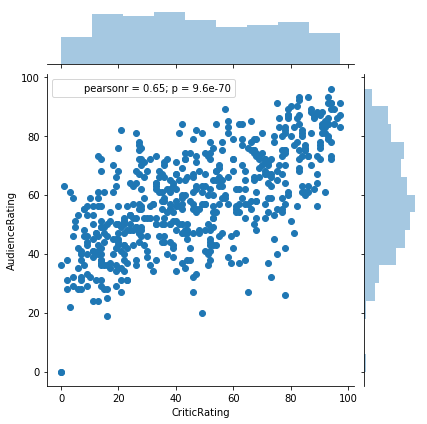

In [12]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

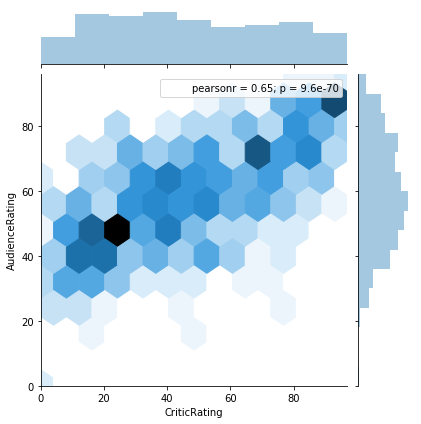

In [13]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

# Histogram

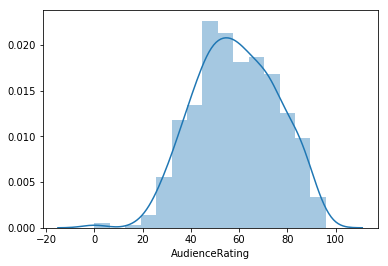

In [14]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

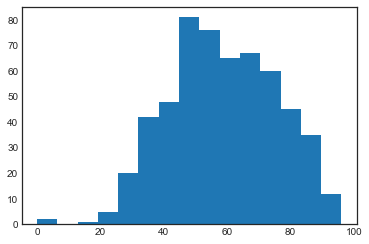

In [20]:
sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins=15)“

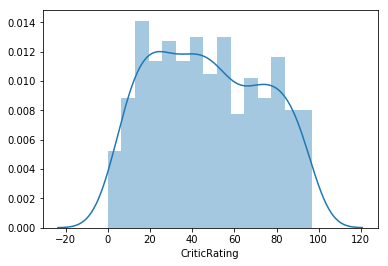

In [15]:
m2 = sns.distplot(movies.CriticRating, bins=15)

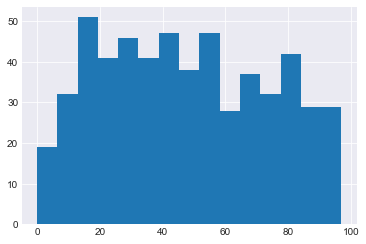

In [16]:
sns.set_style("darkgrid")
n2 = plt.hist(movies.CriticRating, bins=15)



# Stacked Histogram

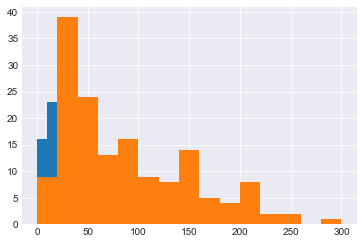

In [17]:
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.show()

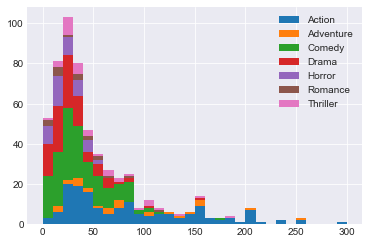

In [18]:
list1 = list()
myLabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    myLabels.append(gen)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=myLabels)
plt.legend()
plt.show()



# KDE Plot

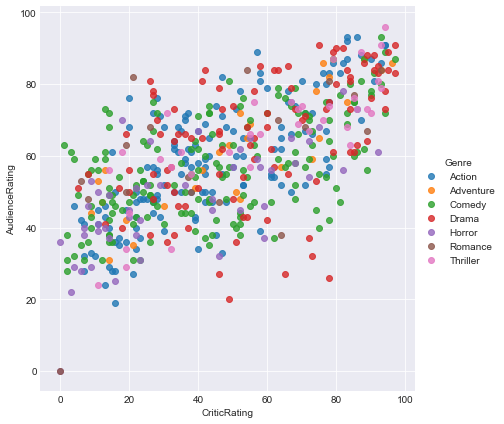

In [19]:
#Way 1
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size=6, aspect=1)

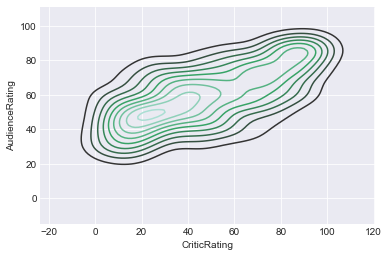

In [20]:
#Way 2
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

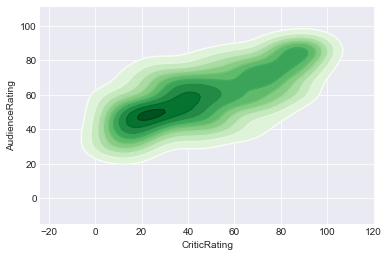

In [21]:
k1a = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Greens')
klb = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Greens')



# Subplots

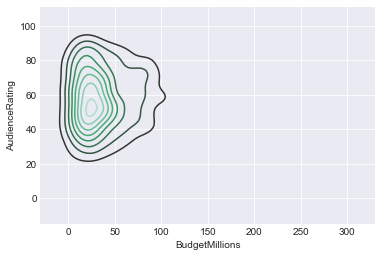

In [22]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

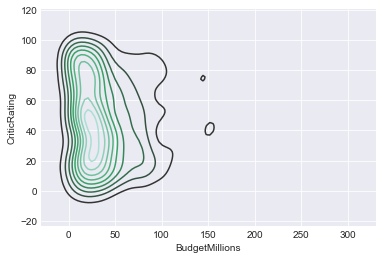

In [23]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

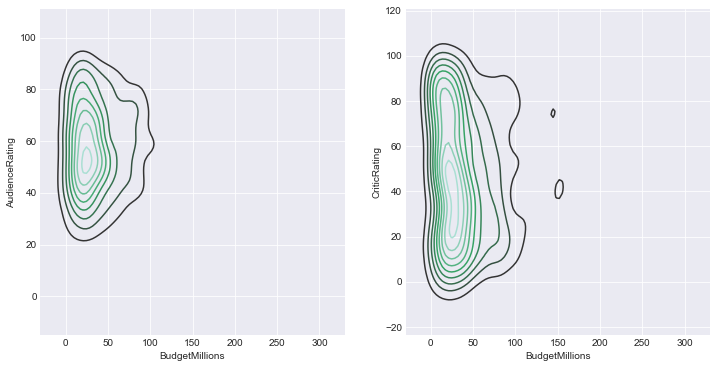

In [24]:
f, axes = plt.subplots(1,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

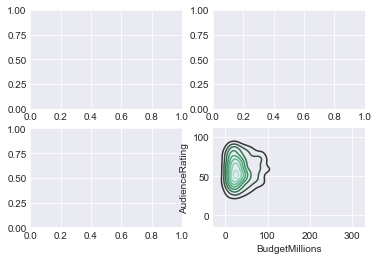

In [25]:
# For two dimension
f, axes = plt.subplots(2,2)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[1,1])

[(-20, 160)]

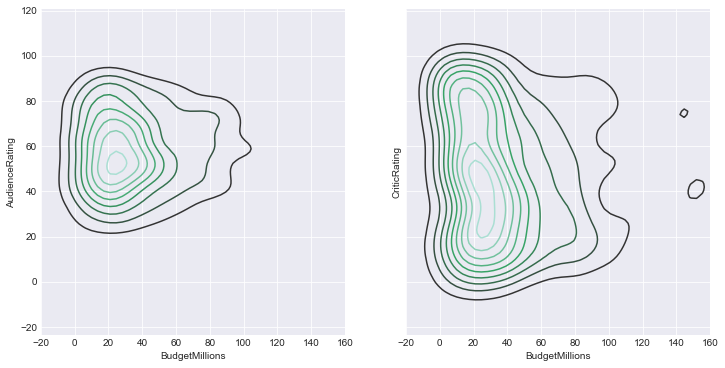

In [26]:
# To zoom and for better
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))



# Violinplot vs. boxplot

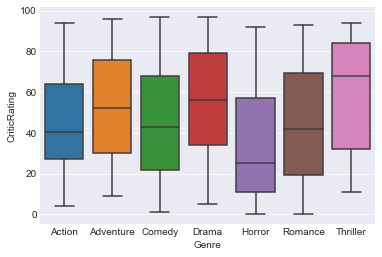

In [27]:
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

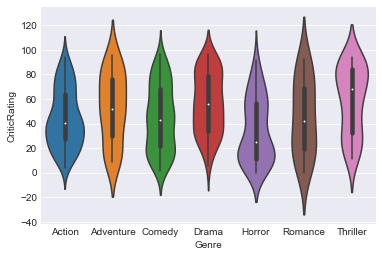

In [28]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')


# Facet Grid

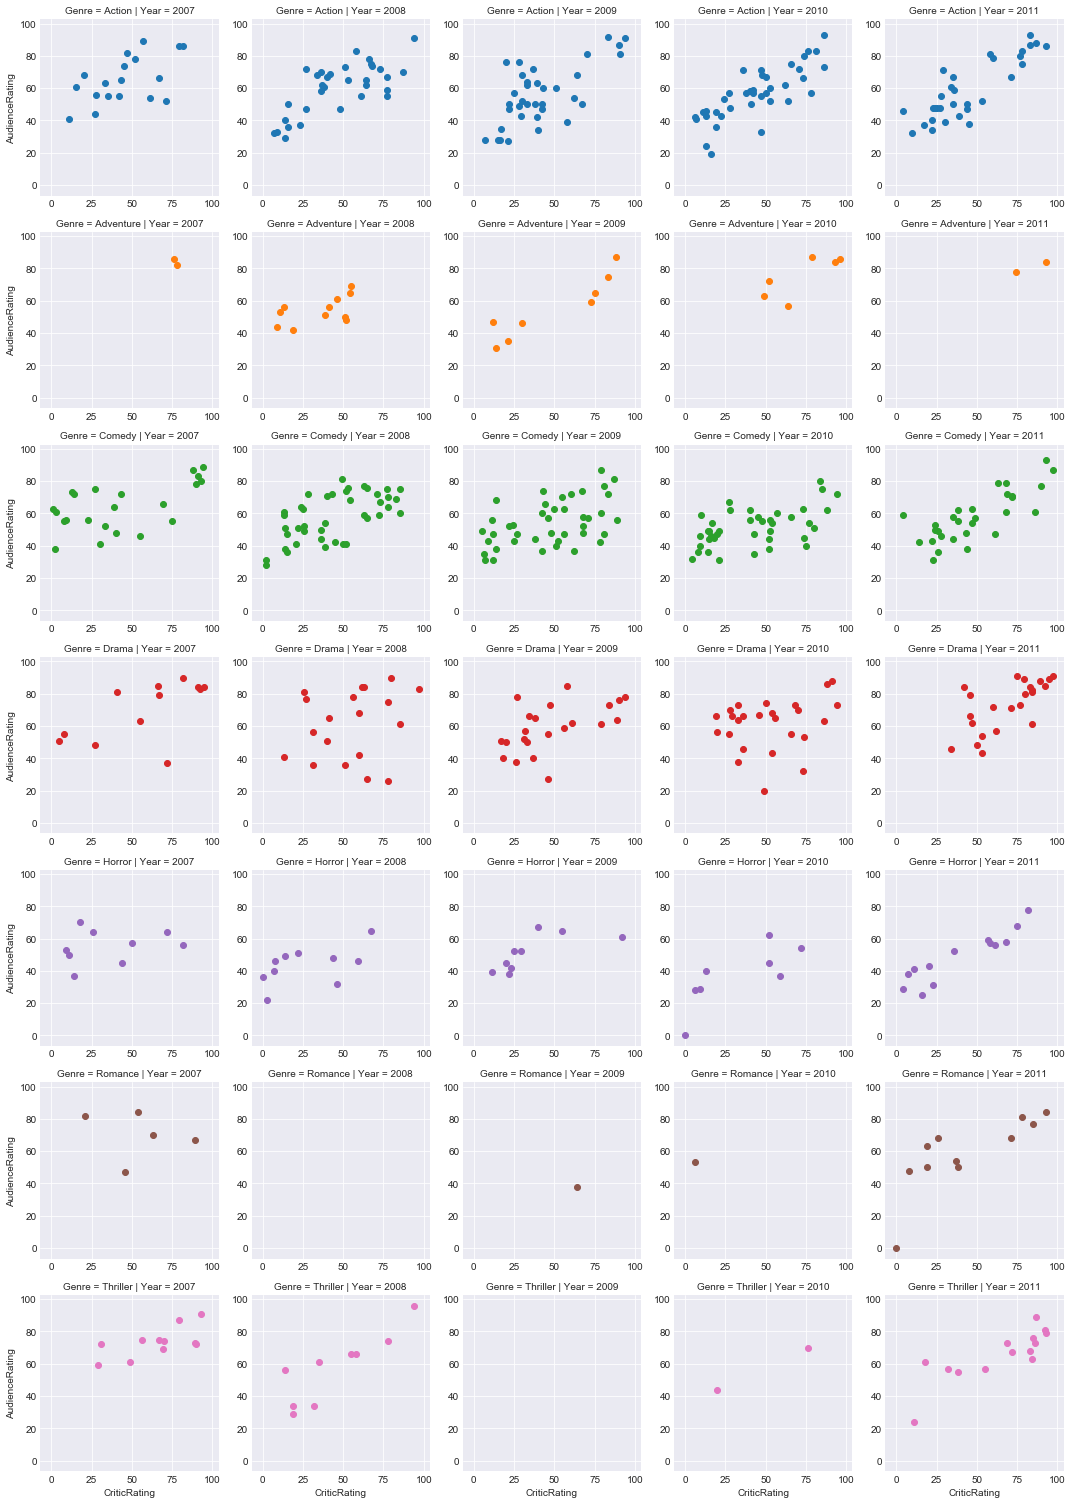

In [29]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

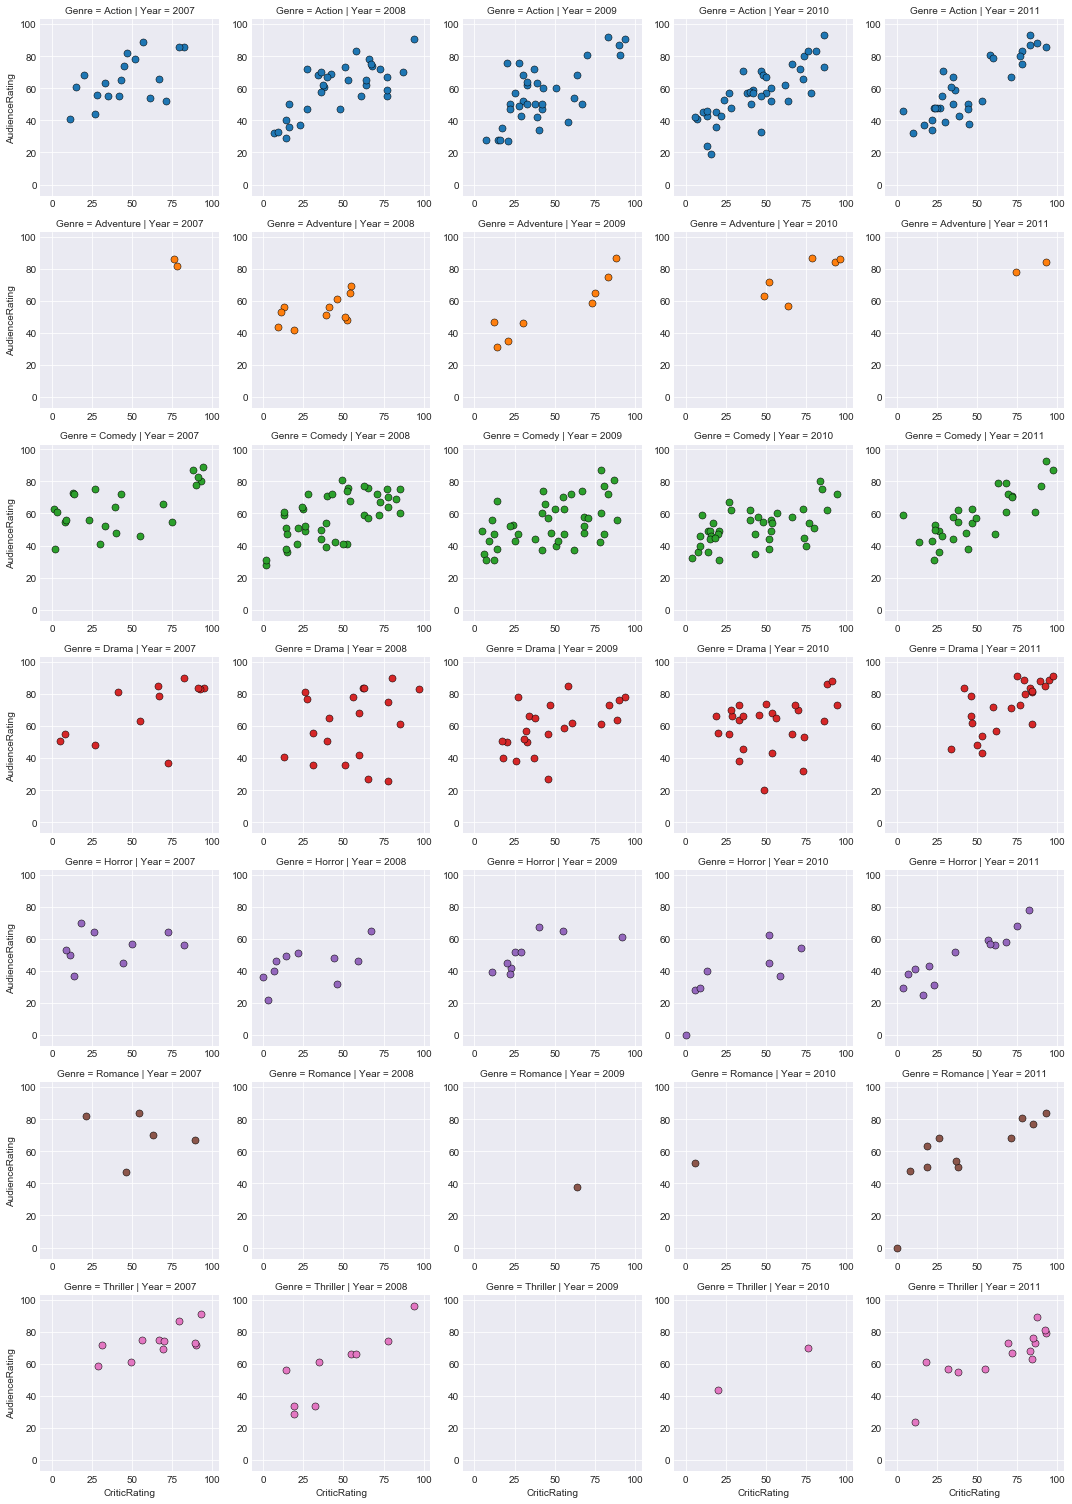

In [30]:
# Add key words
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x1a1a5aff60>>

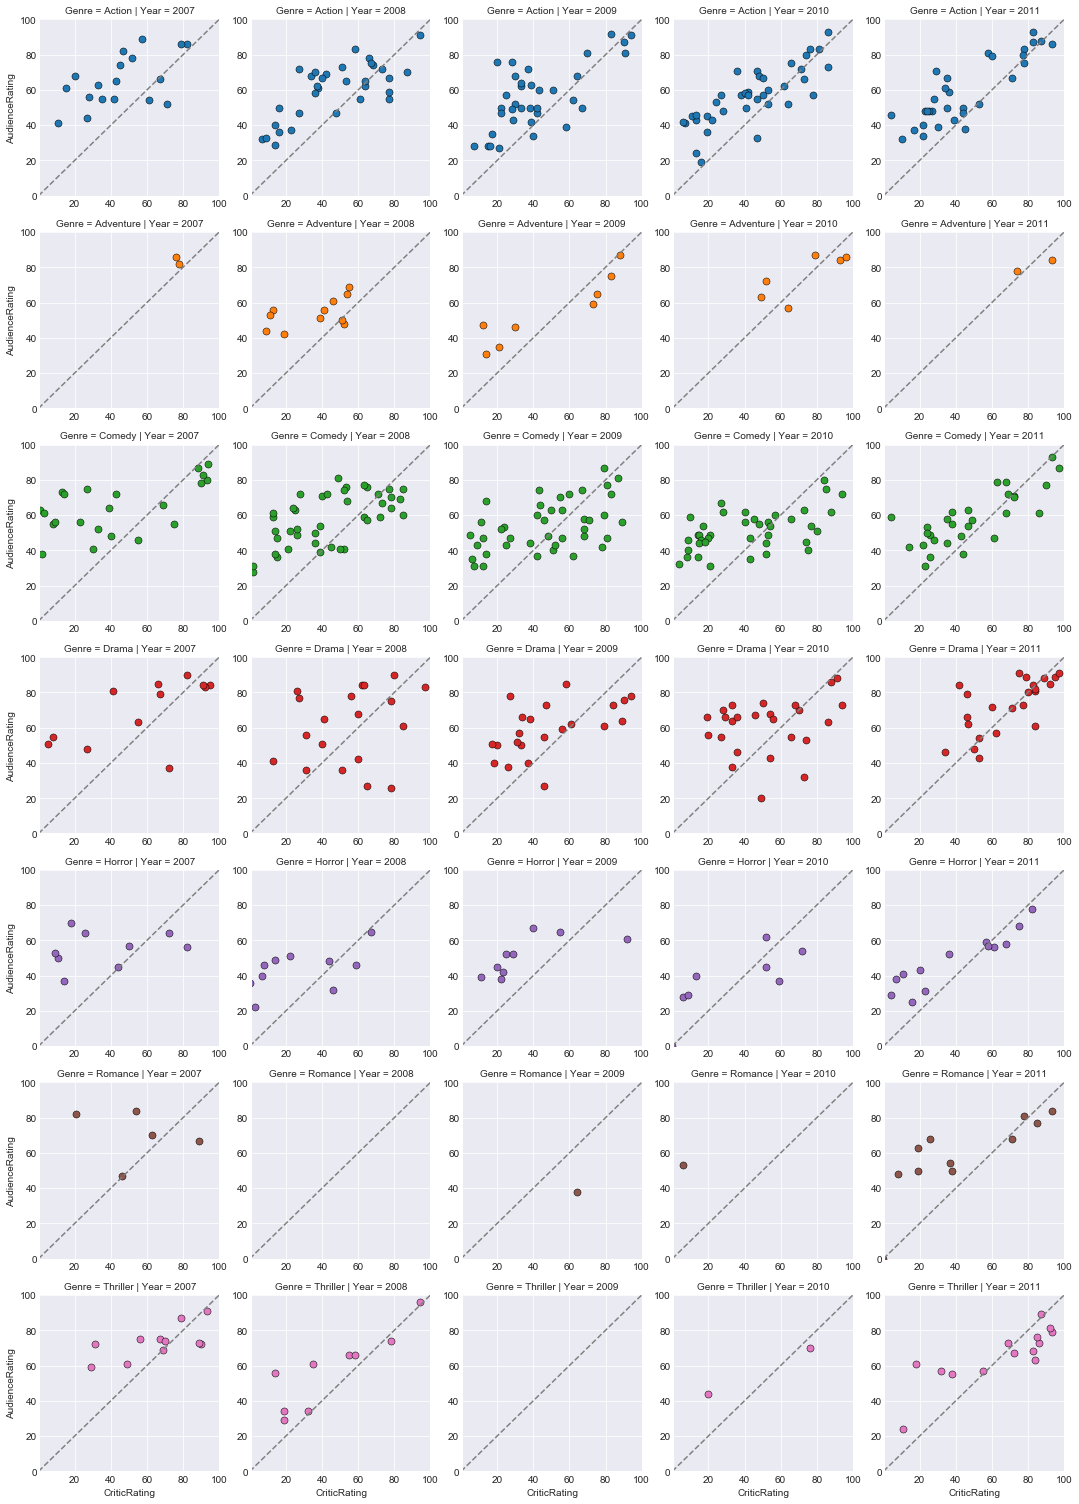

In [31]:
# Add diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(1,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend


# Building Dashboards

[(-20, 160)]

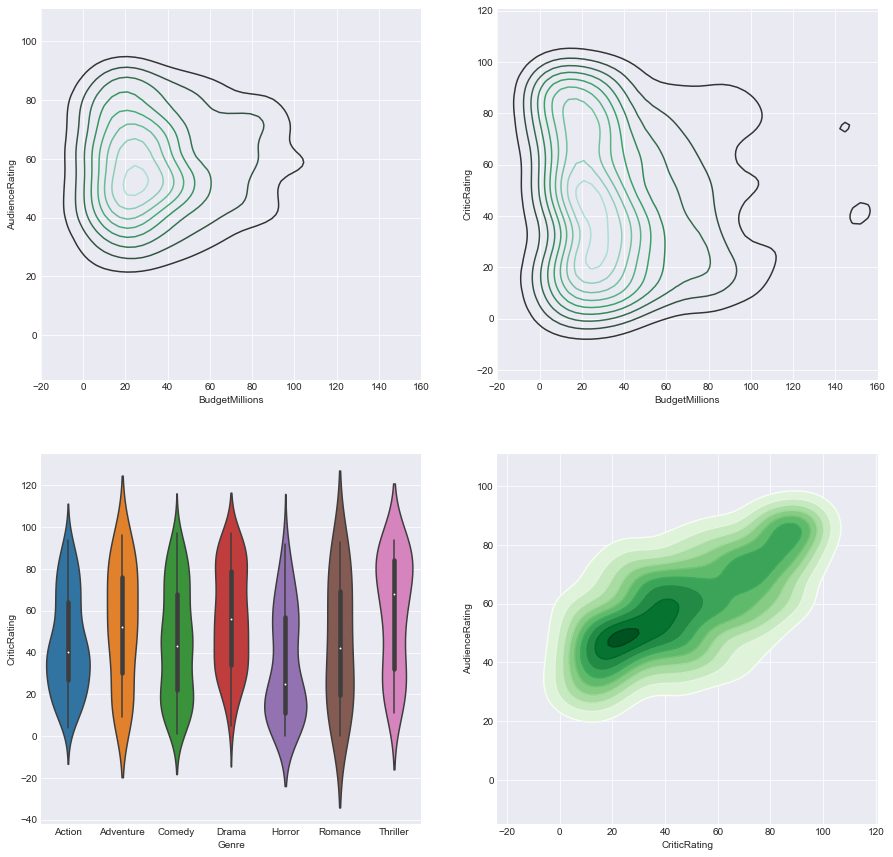

In [32]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
z = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Greens', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Greens', ax=axes[1,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))


Stylingtips in Dashboard

[(-20, 160)]

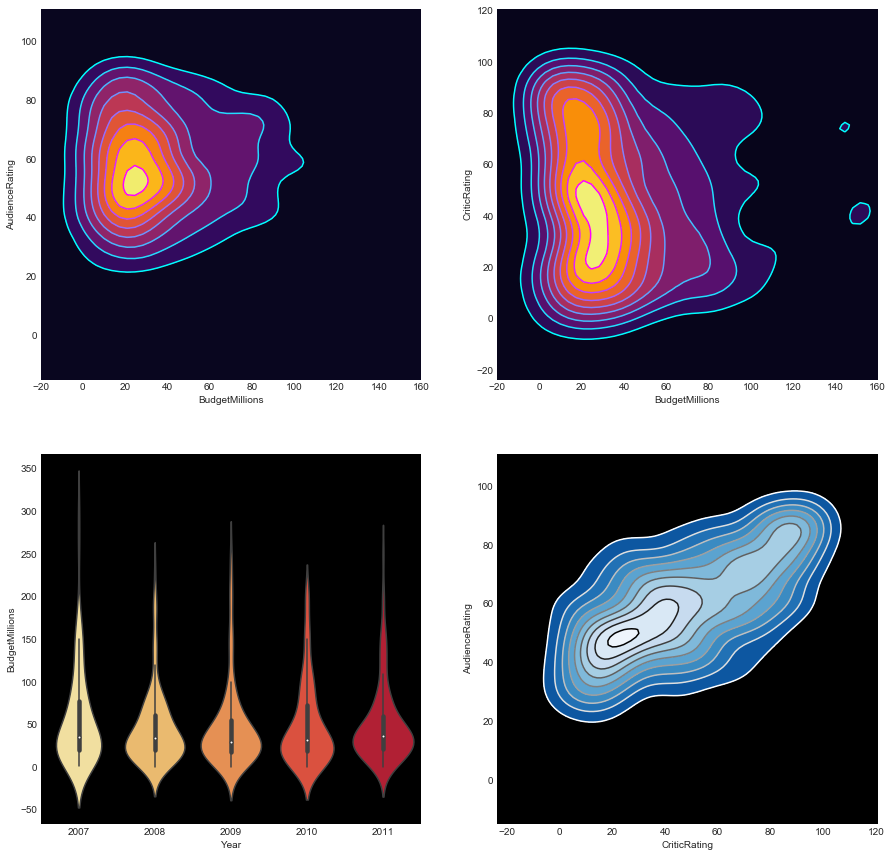

In [37]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2,figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool', ax=axes[0,0])

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='cool', ax=axes[0,1])

z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))


# Finishing Touches

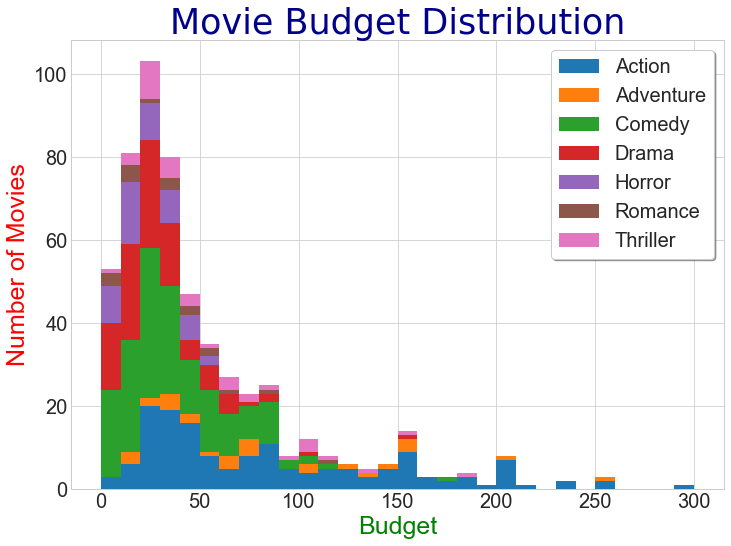

In [39]:
list1 = list()
myLabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    myLabels.append(gen)
#Grid change
sns.set_style("whitegrid")
#Size change
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #A4 paper

h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=myLabels)

#Set title
plt.title("Movie Budget Distribution", fontsize=35, color="DarkBlue", fontname="Console")
#Set label
plt.ylabel("Number of Movies", fontsize=25, color="Red")
plt.xlabel("Budget", fontsize=25, color="Green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#Set Legend
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':20})

plt.show()